In [1]:
!pip install qutip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 48.9 MB/s eta 0:00:00


In [3]:

import qutip as qt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
#parameters  - Hamiltonian
times = np.linspace(0, 1, 201)
psi0 = qt.basis(2, 1)
a0 = qt.destroy(2)
H = a0.dag() * a0

10.0%. Run time:   6.24s. Est. time left: 00:00:00:56
20.0%. Run time:  11.35s. Est. time left: 00:00:00:45
30.0%. Run time:  16.50s. Est. time left: 00:00:00:38
40.0%. Run time:  20.63s. Est. time left: 00:00:00:30
50.0%. Run time:  24.72s. Est. time left: 00:00:00:24
60.0%. Run time:  29.85s. Est. time left: 00:00:00:19
70.0%. Run time:  33.72s. Est. time left: 00:00:00:14
80.0%. Run time:  37.66s. Est. time left: 00:00:00:09
90.0%. Run time:  42.69s. Est. time left: 00:00:00:04
100.0%. Run time:  46.63s. Est. time left: 00:00:00:00
Total run time:  46.66s


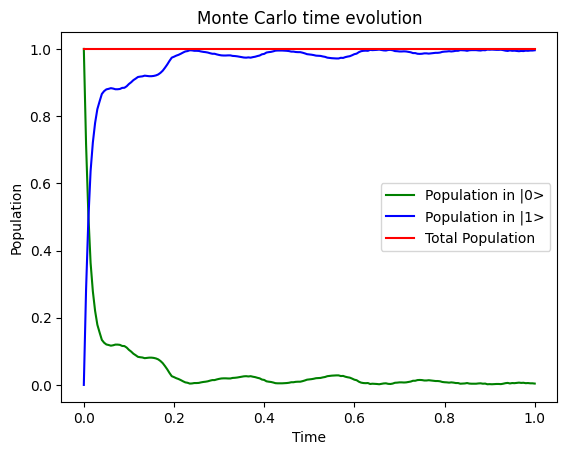

In [15]:
# Rate functions
gamma1 = "kappa * nth"
gamma2 = "kappa * (nth+1) + 12 * np.exp(-2*t**3) * (-np.sin(15*t)**2)"
# gamma2 becomes negative during some time intervals
# nm_mcsolve integration
ops_and_rates = []
ops_and_rates.append([a0.dag(), gamma1])
ops_and_rates.append([a0, gamma2])

# Create an instance of Options class
options = qt.Options(rhs_reuse=True)

MCSol = qt.mcsolve(H, psi0, times, ops_and_rates,
                   args={'kappa': 1.0 / 0.129, 'nth': 0.063},
                   e_ops=[a0.dag() * a0, a0 * a0.dag()],
                   options=options, ntraj=2500)

# mesolve integration for comparison
d_ops = [[qt.lindblad_dissipator(a0.dag(), a0.dag()), gamma1],
         [qt.lindblad_dissipator(a0, a0), gamma2]]

MESol = qt.mesolve(H, psi0, times, d_ops,
                   e_ops=[a0.dag() * a0, a0 * a0.dag()],
                   args={'kappa': 1.0 / 0.129, 'nth': 0.063})

# Calculate total population
total_population = np.array(MCSol.expect[0]) + np.array(MCSol.expect[1])

# Plot results
plt.figure()
plt.plot(times, MCSol.expect[0], 'g', label='Population in |0>')
plt.plot(times, MCSol.expect[1], 'b', label='Population in |1>')
plt.plot(times, total_population, 'r', label='Total Population')
plt.title('Monte Carlo time evolution')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()
